# IMPORTING LIBRARIES

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

import pandas as pd
import matplotlib.pyplot as plt

In [10]:
!pip install prophet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.4/14.4 MB 100.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.5/94.5 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 54.5 MB/s eta 0:00:00


In [11]:
from prophet import Prophet

# LOADING DATASET AND PREPROCESSING

In [3]:
# Load data
data = pd.read_csv('/content/MTA_Subway_Trains_Delayed__Beginning_2020_20241202.csv')

In [4]:
# Select features and target
X = data[['line', 'reporting_category', 'subcategory', 'month']]
y = data['delays']

# Split data into training and testing sets


In [5]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
X_encoded = encoder.fit_transform(X[['line', 'reporting_category']])
print(X_encoded)

  (0, 0)	1.0
  (0, 23)	1.0
  (1, 0)	1.0
  (1, 24)	1.0
  (2, 0)	1.0
  (2, 25)	1.0
  (3, 0)	1.0
  (3, 25)	1.0
  (4, 0)	1.0
  (4, 25)	1.0
  (5, 0)	1.0
  (5, 25)	1.0
  (6, 0)	1.0
  (6, 25)	1.0
  (7, 0)	1.0
  (7, 25)	1.0
  (8, 0)	1.0
  (8, 25)	1.0
  (9, 0)	1.0
  (9, 25)	1.0
  (10, 0)	1.0
  (10, 25)	1.0
  (11, 0)	1.0
  (11, 25)	1.0
  (12, 0)	1.0
  :	:
  (39038, 25)	1.0
  (39039, 22)	1.0
  (39039, 25)	1.0
  (39040, 22)	1.0
  (39040, 25)	1.0
  (39041, 22)	1.0
  (39041, 25)	1.0
  (39042, 22)	1.0
  (39042, 26)	1.0
  (39043, 22)	1.0
  (39043, 27)	1.0
  (39044, 22)	1.0
  (39044, 28)	1.0
  (39045, 22)	1.0
  (39045, 24)	1.0
  (39046, 22)	1.0
  (39046, 25)	1.0
  (39047, 22)	1.0
  (39047, 26)	1.0
  (39048, 22)	1.0
  (39048, 27)	1.0
  (39049, 22)	1.0
  (39049, 28)	1.0
  (39050, 22)	1.0
  (39050, 28)	1.0


# LINEAR REGRESSION FOR DELAY PREDICTION

In [6]:
# Define the regression model
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)
model = LinearRegression()


In [7]:
# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

In [8]:
# Evaluate the model
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R² Score: {r2}")

RMSE: 82.55662820763372
MAE: 48.22464043178041
R² Score: 0.19539960102774778


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


<ipython-input-23-eb2c79784ff0>:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', color='red', lw=2)


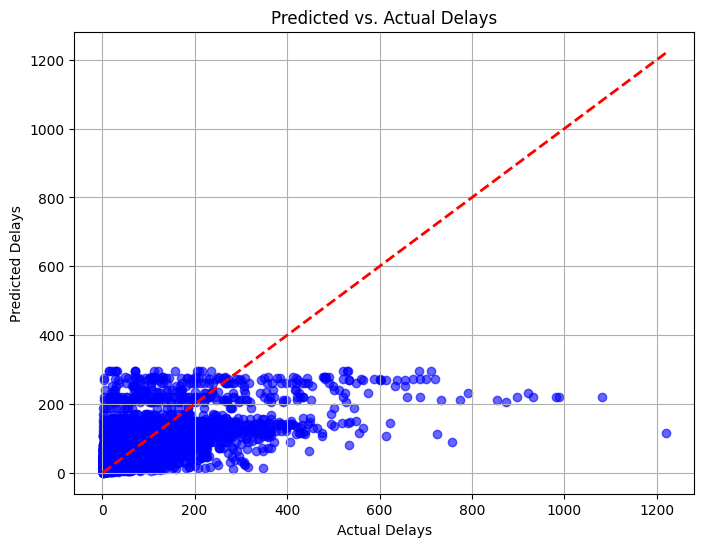

In [ ]:
import matplotlib.pyplot as plt

# Visualize predictions vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', color='red', lw=2)
plt.title('Predicted vs. Actual Delays')
plt.xlabel('Actual Delays')
plt.ylabel('Predicted Delays')
plt.grid(True)
plt.show()

In [ ]:
X_train.head()

,month,line_2,line_3,line_4,line_5,line_6,line_7,line_A,line_B,line_C,...,"subcategory_Public Conduct, Crime, Police Response",subcategory_Rail and Roadbed,subcategory_Service Delivery,subcategory_Service Management,subcategory_Sick/Injured Customer,subcategory_Signal Modernization Capital Project,subcategory_Subways Maintenance,subcategory_Train Brake Activation - Cause Unknown,subcategory_Work Equipment,subcategory_nan
28571,5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
10609,7,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18553,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36325,5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11713,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# TIME-SERIES FORECASTING

In [ ]:
# Convert data into a DataFrame and rename columns
df = pd.DataFrame(data)
df.rename(columns={'month': 'ds', 'delays': 'y'}, inplace=True)
df['ds'] = pd.to_datetime(df['ds'])

# Fit the model
model = Prophet()
model.fit(df)

# Make predictions for the future
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

# Now, merge the actual values from the original data with the predicted values
# We will merge using the 'ds' column (dates)
forecast_actual = pd.merge(forecast[['ds', 'yhat']], df[['ds', 'y']], on='ds', how='left')
# Drop rows with NaN values in either 'y' or 'yhat' columns
forecast_actual = forecast_actual.dropna(subset=['y', 'yhat'])

# Now calculate RMSE and R²
rmse = np.sqrt(mean_squared_error(forecast_actual['y'], forecast_actual['yhat']))
print(f"RMSE: {rmse}")

r2 = r2_score(forecast_actual['y'], forecast_actual['yhat'])
print(f"R²: {r2}")

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0c34z1f2/adepbiq0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0c34z1f2/xgvqmba5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91806', 'data', 'file=/tmp/tmp0c34z1f2/adepbiq0.json', 'init=/tmp/tmp0c34z1f2/xgvqmba5.json', 'output', 'file=/tmp/tmp0c34z1f2/prophet_modelg860y_vg/prophet_model-20241203222854.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:28:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:29:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


RMSE: 90.05710294409565
R²: 0.0132208442870404
RMSE: 90.05710294409565
R²: 0.0132208442870404


# PREDICTION WITH OTHER MODELS

In [ ]:
df = pd.DataFrame(data)

# Rename columns for Prophet (ds for dates, y for target variable)
df.rename(columns={'month': 'ds', 'delays': 'y'}, inplace=True)

# Convert 'ds' to datetime
df['ds'] = pd.to_datetime(df['ds'])

# Prepare data for machine learning models - create additional features from the date such as month, year, day of the week, etc.
df['month'] = df['ds'].dt.month
df['year'] = df['ds'].dt.year
df['day'] = df['ds'].dt.dayofweek

categorical_columns = ['division', 'line', 'day_type', 'reporting_category', 'subcategory']
df_encoded = pd.get_dummies(df, columns=categorical_columns)

X = df_encoded[['month', 'year', 'day'] + [col for col in df_encoded.columns if col not in ['ds', 'y', 'month', 'year', 'day']]]
y = df_encoded['y']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),  # Increase max_iter for convergence
    "KNN Regression": KNeighborsRegressor(),
    "Linear Regression": LinearRegression(),
    "Decision Tree Regression": DecisionTreeRegressor(),
    "Random Forest Regression": RandomForestRegressor()
}

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: Logistic Regression
RMSE: 104.9361951100214
R²: -0.29995097898812206
----------------------------------------
Model: KNN Regression
RMSE: 65.97351598303476
R²: 0.4861745524264691
----------------------------------------
Model: Linear Regression
RMSE: 73.38861410840039
R²: 0.36418067709647683
----------------------------------------
Model: Decision Tree Regression
RMSE: 54.79459789074045
R²: 0.6455525650694969
----------------------------------------


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0c34z1f2/ejl_2wnc.json


Model: Random Forest Regression
RMSE: 41.40362680224978
R²: 0.7976267435691422
----------------------------------------


DEBUG:cmdstanpy:input tempfile: /tmp/tmp0c34z1f2/00rxvp6z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30648', 'data', 'file=/tmp/tmp0c34z1f2/ejl_2wnc.json', 'init=/tmp/tmp0c34z1f2/00rxvp6z.json', 'output', 'file=/tmp/tmp0c34z1f2/prophet_model9z0d03y5/prophet_model-20241204001209.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:12:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:12:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


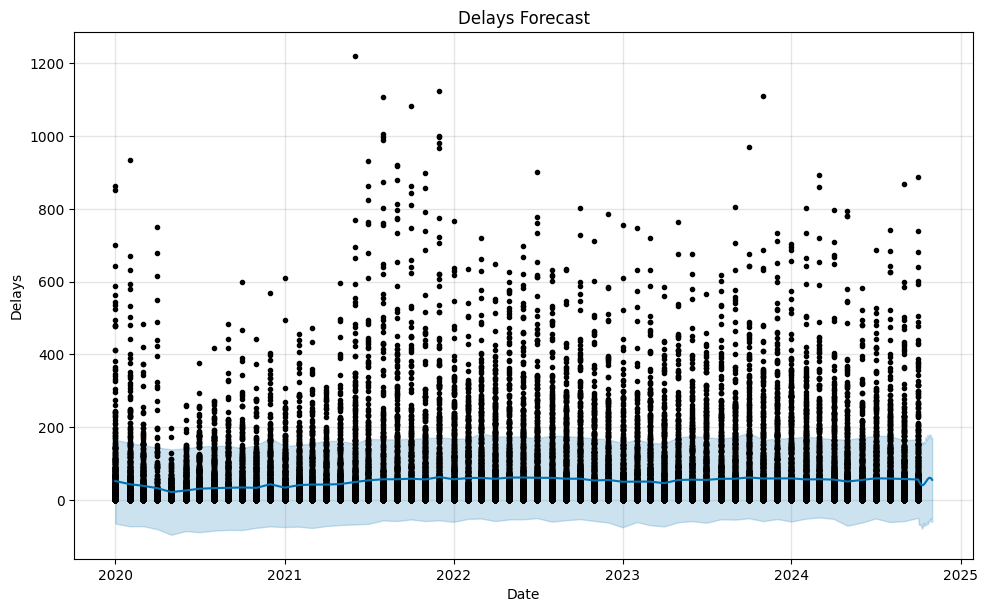

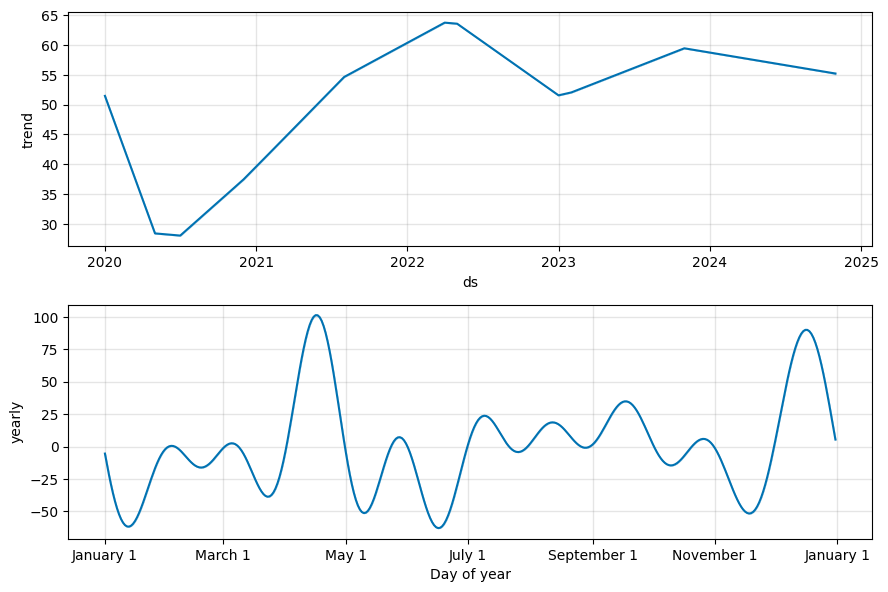

In [ ]:
# Train and evaluate each model
for name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate RMSE and R²
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    print(f"Model: {name}")
    print(f"RMSE: {rmse}")
    print(f"R²: {r2}")
    print("-" * 40)

# Prophet model for time series forecasting
# Initialize Prophet model
prophet_model = Prophet()

# Fit the model
prophet_model.fit(df)

# Create a DataFrame for future dates
future = prophet_model.make_future_dataframe(periods=30)  # Forecast for the next 30 days

# Predict future delays
forecast = prophet_model.predict(future)

# Plot forecast
prophet_model.plot(forecast)
plt.title("Delays Forecast")
plt.xlabel("Date")
plt.ylabel("Delays")
plt.show()

# Plot components (trend and seasonality)
prophet_model.plot_components(forecast)
plt.show()

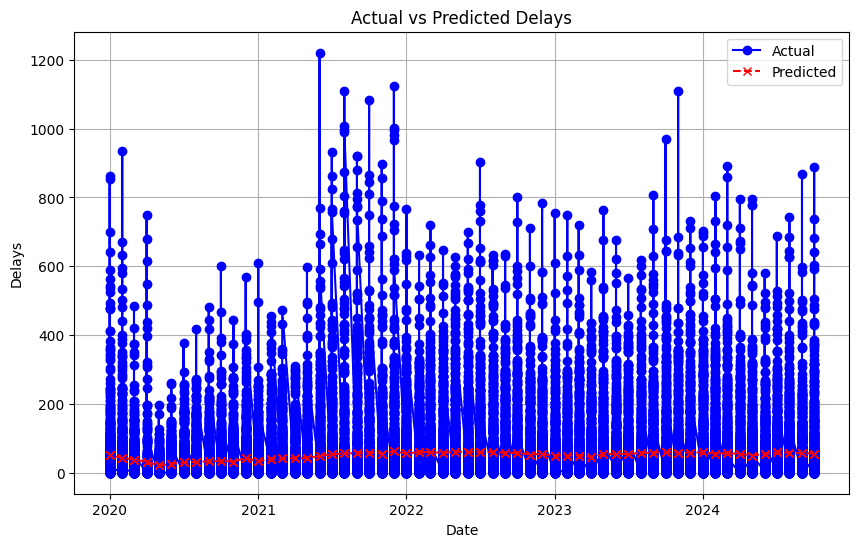

In [ ]:
# Extract actual values from your original data (training data)
actual = df[['ds', 'y']]

# Extract predicted values (yhat) from the forecasted data
# Prophet gives predictions for both historical and future dates
predicted = forecast[['ds', 'yhat']]

# Merge the actual and predicted values on the date ('ds')
merged = pd.merge(actual, predicted, on='ds', how='inner')  # 'inner' merge keeps only common dates

# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(merged['ds'], merged['y'], label='Actual', color='blue', linestyle='-', marker='o')
plt.plot(merged['ds'], merged['yhat'], label='Predicted', color='red', linestyle='--', marker='x')

plt.title("Actual vs Predicted Delays")
plt.xlabel("Date")
plt.ylabel("Delays")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Assuming df is your original dataframe
def create_features(df):
    df = df.copy()

    # Time-based features
    df['hour'] = df['ds'].dt.hour
    df['month'] = df['ds'].dt.month
    df['year'] = df['ds'].dt.year
    df['day'] = df['ds'].dt.day
    df['day_of_week'] = df['ds'].dt.dayofweek
    df['quarter'] = df['ds'].dt.quarter
    df['is_weekend'] = df['ds'].dt.dayofweek.isin([5, 6]).astype(int)

    # Create cyclical features for time variables
    df['month_sin'] = np.sin(2 * np.pi * df['month']/12)
    df['month_cos'] = np.cos(2 * np.pi * df['month']/12)
    df['day_sin'] = np.sin(2 * np.pi * df['day']/31)
    df['day_cos'] = np.cos(2 * np.pi * df['day']/31)

    return df

In [ ]:
df_engineered = create_features(df)

categorical_columns = ['division', 'line', 'day_type', 'reporting_category', 'subcategory']
df_encoded = pd.get_dummies(df_engineered, columns=categorical_columns)

# Prepare features
feature_columns = [col for col in df_encoded.columns
                  if col not in ['ds', 'y']
                  and not col.startswith('future_')]
X = df_encoded[feature_columns]
y = df_encoded['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define hyperparameter search space
param_dist = {
    'n_estimators': [200, 300, 400, 500],
    'max_depth': [20, 30, 40, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],  # Remove 'auto'
    'bootstrap': [True, False]
}

In [ ]:
# Add error handling
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=50,  # Reduce iterations
    cv=5,
    random_state=42,
    n_jobs=-1,
    scoring='neg_root_mean_squared_error',
    error_score='raise'  # Add error handling
)

# Initialize Random Forest with random state
rf = RandomForestRegressor(random_state=42)

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=100,
    cv=5,
    random_state=42,
    n_jobs=-1,
    scoring='neg_root_mean_squared_error'
)

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best parameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 40, 'bootstrap': False}
RMSE: 45.61944555724613
R²: 0.754316293882784


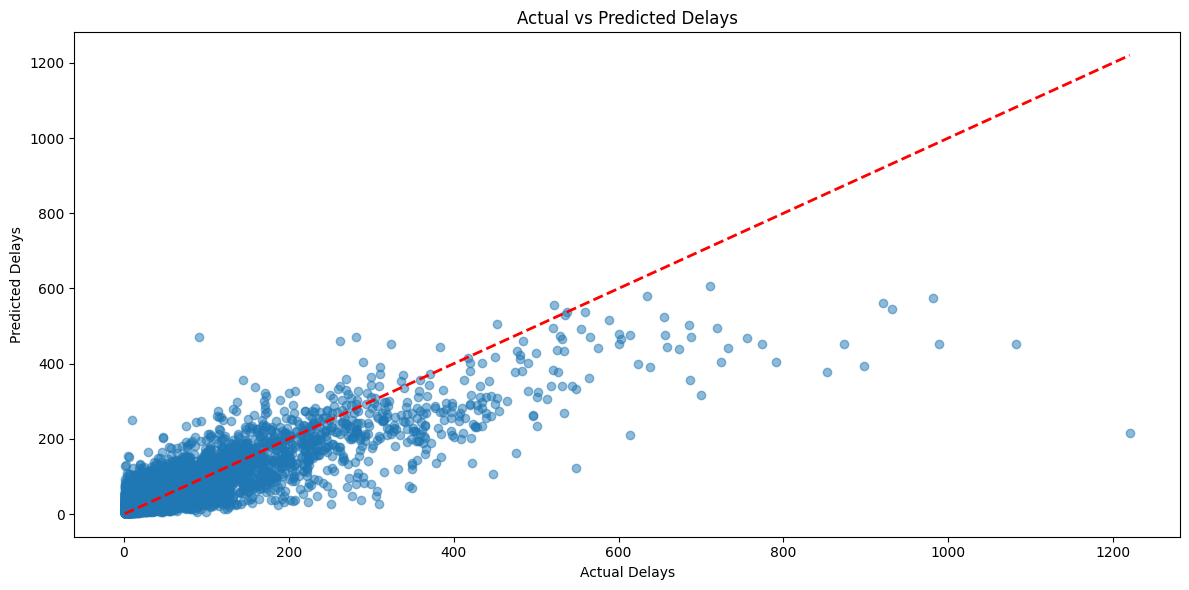

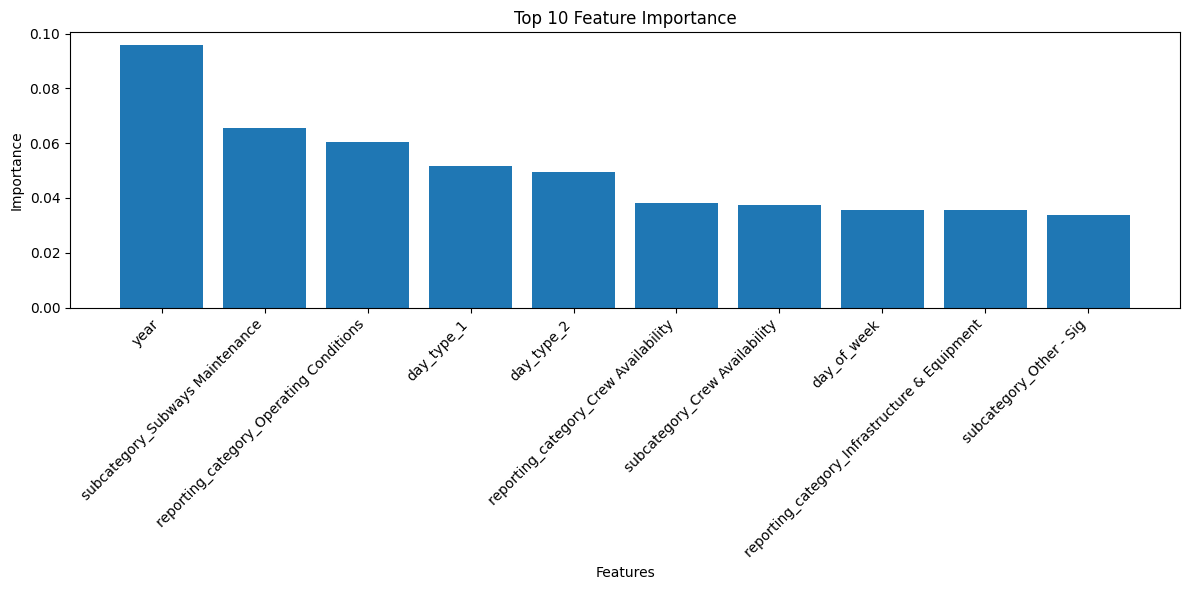

In [ ]:
# Fit the random search
random_search.fit(X_train_scaled, y_train)

# Get best model
best_rf = random_search.best_estimator_

# Make predictions
y_pred = best_rf.predict(X_test_scaled)

# Calculate metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Best parameters: {random_search.best_params_}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

# Plot actual vs predicted
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Delays')
plt.ylabel('Predicted Delays')
plt.title('Actual vs Predicted Delays')
plt.tight_layout()
plt.show()

# Feature importance plot
feature_importance = pd.DataFrame({
    'feature': feature_columns,
    'importance': best_rf.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(feature_importance['feature'][:10], feature_importance['importance'][:10])
plt.xticks(rotation=45, ha='right')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Top 10 Feature Importance')
plt.tight_layout()
plt.show()
